In [1]:
using Plots

In [2]:
l = 1
N = 1000
c = 1

function linspace(end_point, N::Int)
    list = Float64[]
    increment = Float64(end_point / N)
    for i in range(1, N)
        append!(list, (increment*i)::Float64)
    end
    return list, increment
end

Ψ_one = (x) -> sin(2 * π * x)
Ψ_two = (x) -> sin( 5 * π * x)
function Ψ_three(x)
    if ( x  < 1/5 || x > 2/5)
        return 0
    else
        return sin( 5 * π * x)
    end
end



function initial_vals(x_array::Array, Ψ)
    initial_vals = []
    for x in x_array
        push!(initial_vals, Ψ(x))
    end
    return initial_vals
end

initial_vals (generic function with 1 method)

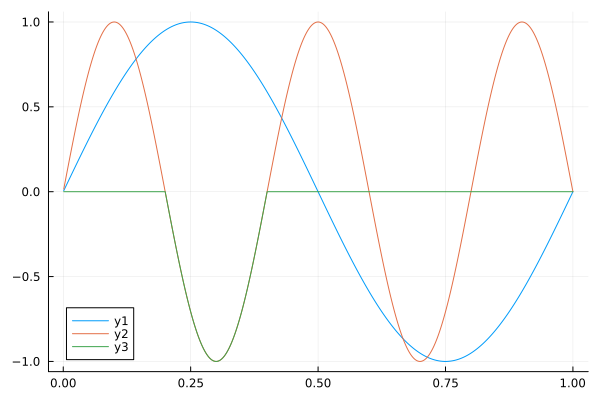

In [3]:
space_array, increment = linspace(1, 1000)

start_values_one = initial_vals(space_array, Ψ_one)
start_values_two = initial_vals(space_array, Ψ_two)
start_values_three = initial_vals(space_array, Ψ_three)
plot(space_array, start_values_one)
plot!(space_array, start_values_two)
plot!(space_array, start_values_three)


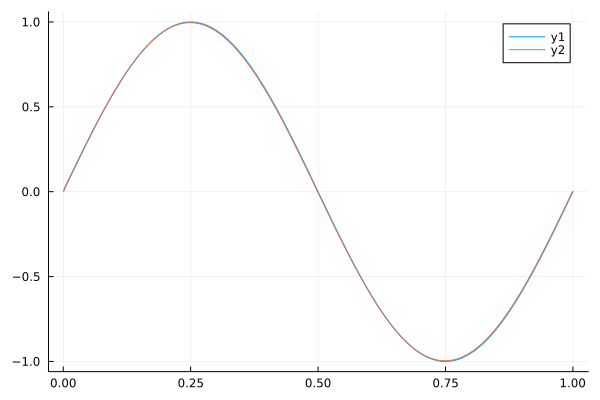

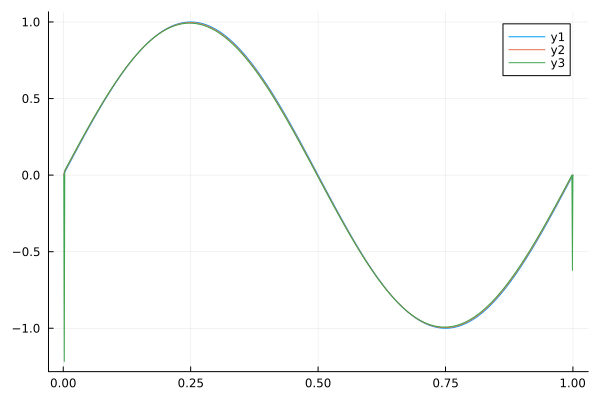

In [4]:
function next_wave_iteration(array, previous_array, c=1, increment_space = increment, increment_time = 0.01)
    new_array = zeros(1000)

    for i in range(1 , length(array) -2)
        i += 1 

        left = array[i-1]
        right = array[i+1]
        current = array[i]
        past = previous_array[i]
        
        new_array[i] = c^2 * ((increment_time)^2 /(increment_space)^2) * (right + left - 2*current) - left + 2*current
    end

    return new_array
end
starting_array = zeros(1000)
new_array = next_wave_iteration(start_values_one, starting_array)
plot(space_array, start_values_one)
display(plot!(space_array, new_array))
new_array = next_wave_iteration(new_array, start_values_one)
plot!(space_array, new_array)
#print(length(start_values_one))

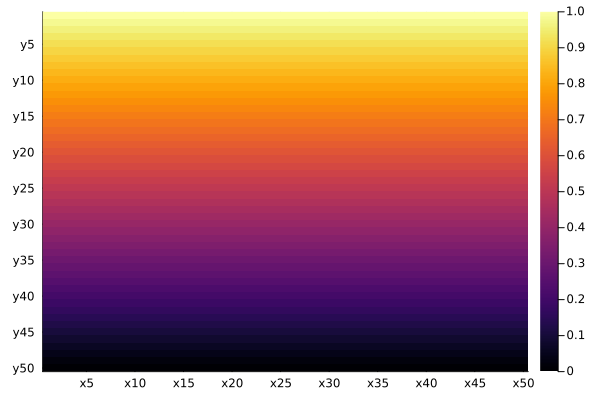

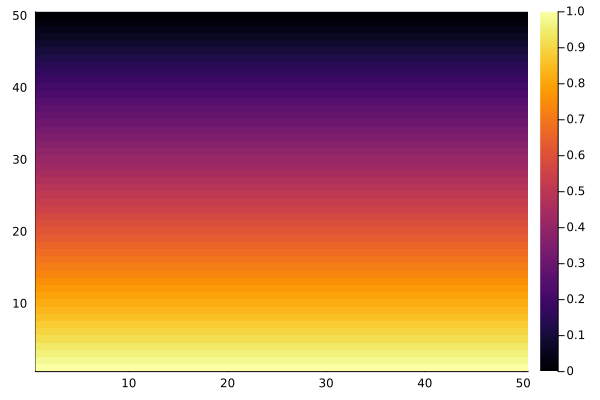

In [5]:
function create_initial_grid(size)
    start_grid = zeros(size, size)
    start_grid[1,:] .= 1
    return start_grid
end

function create_grid_with_boundaries(grid)
    #x-axis periodic boundaries
    A = grid[:,end-1] 
    C = grid[:,1]
    new_grid = hcat(A, grid ,C) #copy right and left side to opposite side
    return new_grid
end


function jacobi_iteration(grid)
    size = length(grid[:,2]) #essential to take vertical bc copied x-axis boundaries
    #println(size)
    new_grid = zeros(size, size)
    new_grid[1,:] .=1
    for i in range(2, size-1) 
        for j in range(2, size+1)
            left  = grid[i, j-1]
            right = grid[i, j+1]
            lower = grid[i+1, j]
            upper = grid[i-1, j]
            
            new_value = (1/4) * (upper + lower + left + right)
            new_grid[i,j-1] = new_value
        end
    end
    return new_grid
end

A = create_initial_grid(50)
for _ in range(1,50000)
    A_boundaries = create_grid_with_boundaries(A)
    A = jacobi_iteration(A_boundaries)
end
A

xs = [string("x", i) for i = 1:50]
ys = [string("y", i) for i = 1:50]

heatmap1 = heatmap(xs, ys, A, yflip = true)
display(heatmap1)

A = create_initial_grid(50)
for _ in range(1,50000)
    A_boundaries = create_grid_with_boundaries(A)
    A = jacobi_iteration(A_boundaries)
end
A

heatmap2 = heatmap(A)
display(heatmap2)




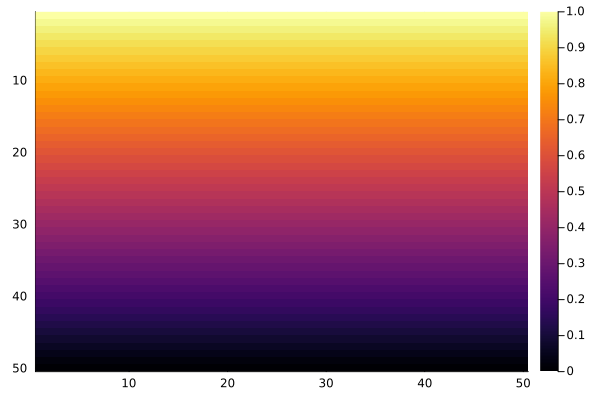

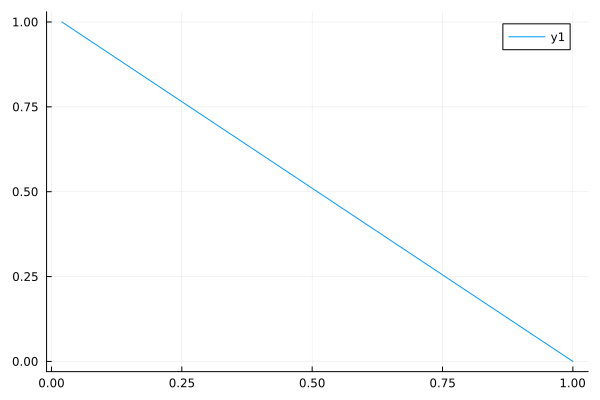

In [17]:
function gaus_seidel_iteration(grid)
    size = length(grid[:,2]) #essential to take vertical bc copied x-axis boundaries
    #println(size)
    for i in range(2, size-1) 
        for j in range(2, size+1)
            left  = grid[i, j-1]
            right = grid[i, j+1]
            lower = grid[i+1, j]
            upper = grid[i-1, j]
            
            new_value = (1/4) * (upper + lower + left + right)
            grid[i,j] = new_value
        end
    end
    dropped_edges_grid = grid[:,2:end-1]
    return dropped_edges_grid
end

A = create_initial_grid(50)
#for _ in range(1,50000)
#    A_boundaries = create_grid_with_boundaries(A)
#    A = gaus_seidel_iteration(A_boundaries)
#end

for _ in range(1,5000)
    A_boundaries = create_grid_with_boundaries(A)
    A = gaus_seidel_iteration(A_boundaries)
end
display(heatmap(A, yflip = true))
x_line = linspace(1,50)
plot(x_line, A[:,1])

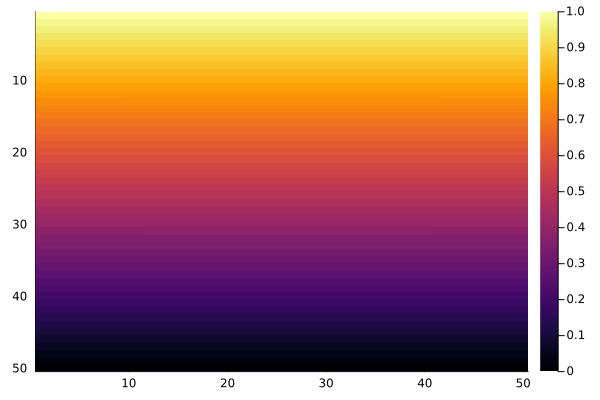

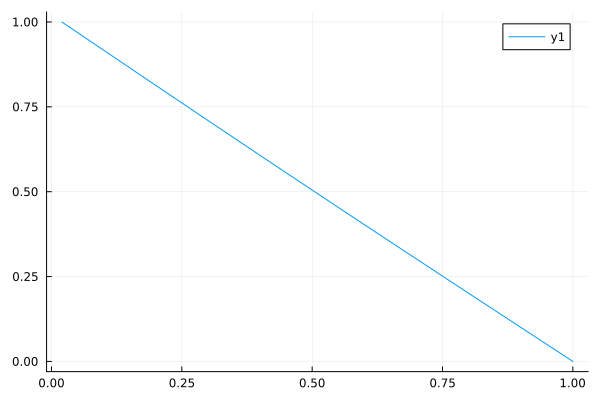

In [21]:
function successive_over_relaxation(grid, ω)
    size = length(grid[:,2]) #essential to take vertical bc copied x-axis boundaries
    #println(size)
    for i in range(2, size-1) 
        for j in range(2, size+1)
            left  = grid[i, j-1]
            right = grid[i, j+1]
            lower = grid[i+1, j]
            upper = grid[i-1, j]
            
            current_value = grid[i,j]
            new_value = (ω/4) * (upper + lower + left + right) + (1 - ω) * current_value
            grid[i,j] = new_value
        end
    end
    dropped_edges_grid = grid[:,2:end-1]
    return dropped_edges_grid
end

A = create_initial_grid(50)
for _ in range(1,1000)
    A_boundaries = create_grid_with_boundaries(A)
    A = successive_over_relaxation(A_boundaries, 1.4)
end

display(heatmap(A, yflip = true))
x_line = linspace(1,50)
plot(x_line, A[:,1])
